In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_csv('Mall_Customers.csv')
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [56]:
df.shape

(200, 5)

In [57]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


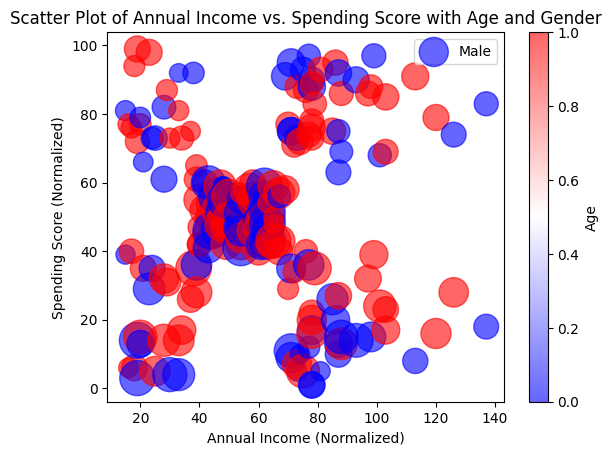

In [58]:
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']
age = df['Age']
gender = df['Gender']

plt.scatter(x, y, c=gender, cmap='bwr', s=age*10, alpha=0.6)
plt.xlabel('Annual Income (Normalized)')
plt.ylabel('Spending Score (Normalized)')
plt.title('Scatter Plot of Annual Income vs. Spending Score with Age and Gender')

plt.legend(['Male', 'Female'])

cbar = plt.colorbar()
cbar.set_label('Age')

plt.show()

In [59]:
km = KMeans(n_clusters=3)
km.n_init = 10
y_predicted = km.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [63]:
df['cluster'] = y_predicted
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0
...,...,...,...,...,...,...
195,196,1,35,120,79,1
196,197,1,45,126,28,2
197,198,0,32,126,74,1
198,199,0,32,137,18,2


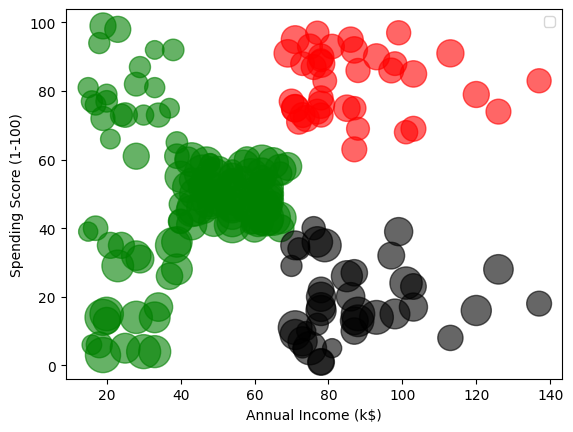

In [64]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green', s=df1['Age']*10, alpha=0.6)
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red', s=df2['Age']*10, alpha=0.6)
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='black', s=df3['Age']*10, alpha=0.6)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [65]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,0.019231,0.000000,0.387755,0
1,2,0,0.057692,0.000000,0.816327,0
2,3,1,0.038462,0.008197,0.051020,0
3,4,1,0.096154,0.008197,0.775510,0
4,5,1,0.250000,0.016393,0.397959,0
...,...,...,...,...,...,...
195,196,1,0.326923,0.860656,0.795918,1
196,197,1,0.519231,0.909836,0.275510,2
197,198,0,0.269231,0.909836,0.744898,1
198,199,0,0.269231,1.000000,0.173469,2


In [78]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.n_init = 10
  km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  sse.append(km.inertia_)

In [79]:
sse

[23.04072032603991,
 13.993505283127973,
 9.058985215159453,
 6.110312266413656,
 3.5831179059525606,
 3.10198077972975,
 2.624103948396722,
 2.2188402609846722,
 1.8738750959041317]

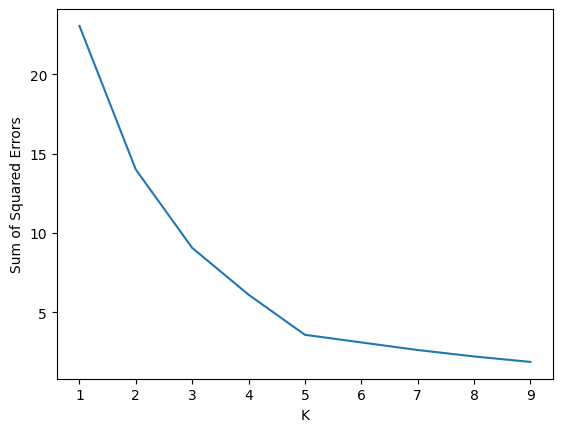

In [80]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng, sse)

In [93]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [94]:
df['cluster'] = y_predicted
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,0.019231,0.000000,0.387755,0
1,2,0,0.057692,0.000000,0.816327,2
2,3,1,0.038462,0.008197,0.051020,0
3,4,1,0.096154,0.008197,0.775510,2
4,5,1,0.250000,0.016393,0.397959,0
...,...,...,...,...,...,...
195,196,1,0.326923,0.860656,0.795918,1
196,197,1,0.519231,0.909836,0.275510,3
197,198,0,0.269231,0.909836,0.744898,1
198,199,0,0.269231,1.000000,0.173469,3


In [95]:
km.cluster_centers_

array([[0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.6       , 0.16443149],
       [0.33029751, 0.49508692]])

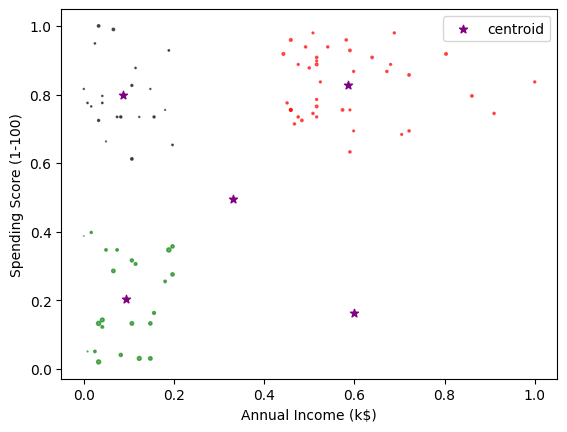

In [97]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green', s=df1['Age']*10, alpha=0.6)
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red', s=df2['Age']*10, alpha=0.6)
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='black', s=df3['Age']*10, alpha=0.6)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()